# BASIC EXAMPLE: HYPOTHESIS TESTING

This project is carried out as a project to practice following concepts:
1. Sampling/Bias
2. Hypothesis testing
3. Visualization
4. Etc.

Following steps are takes,
1. Data loading
2. Data describing
3. Data visualization
4. Missing value handling
5. Invalid data removal
6. Correlation of variable
7. Setting hypothesis
8. Prove data is normally distributed
9. Random sampling
10. Hypothesis testing using t-test/p-values

Detail and source code problem can be found [here](https://github.com/PraAnj/hypothesis-testing/blob/master/ds%20project.ipynb)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
import warnings

sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline

## Introduction

The Panel Study Income Dyamic (PSID) dataset contains information about 4856 people. It contains their age, education, earnings, hours, number of kids and their marital status. We are trying to *analyze whether the number of hours a person work has an impact on his/her earnings*

The visualization about the data can be found [here](https://datastudio.google.com/reporting/f6ad033e-fa20-4755-802a-332655d5980b)

In [ ]:
df_data = pd.read_csv("https://raw.githubusercontent.com/PraAnj/hypothesis-testing/master/PSID.csv")
df_data.head(2)

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced


## Modify: Remove First-Three Columns

In [ ]:
df_data = df_data.drop(["Seq No", "intnum", "persnum"], axis=1)
df_data.head(2)

,age,educatn,earnings,hours,kids,married
0,39,12.0,77250,2940,2,married
1,35,12.0,12000,2040,2,divorced


## Describing Dataset

- Get dimension of all datasets
- Analyze unique value of all datasets
- Analyze duplicate value of all datasets
- Analyze missiing value of all datasets

In [ ]:
# class to do preanalysis of dataset
class PreProcessing:
  def __init__(self, dataframe):
    self.dataframe = dataframe
  
  # method to get infomration about shape of the dataset
  def get_shape(self):
    print("  Total number of row in the dataset is {}".format(self.dataframe.shape[0]))
    print("  Total number of column in the dataset is {}".format(self.dataframe.shape[1]))

  # method to identify duplicate value in the dataset
  def identifies_duplicate(self):
    list_column = list(self.dataframe.columns)
    for i in list_column:
      print("  Total number of duplicated value for column {} is {}".format(i, sum(self.dataframe[i].duplicated())))
      if (sum(self.dataframe[i].duplicated()) == 0):  # if the duplicate value == 0
        print("  - there is no duplicate value in column {}".format(i))
  
  # method to calculate unique value in the dataset
  def identifies_unique(self):
    list_column = list(self.dataframe.columns)
    for i in list_column:
      print("  Total number of unique value for column {} is {}".format(i, self.dataframe[i].nunique()))
      if (self.dataframe[i].nunique() == self.dataframe[i].shape[0]): # if all value in the column is unique value
        print("  - all values in column {} is unique value".format(i))

  # method to calculate null value in all column of the dataset
  def identifies_null(self):
    list_column = list(self.dataframe.columns)
    row_count = 0
    for i in list_column:
      null_count = self.dataframe[i].isnull().sum()
      if (null_count != 0):
        print("  For column {}, there are any {} row of null value".format(i, null_count))
        row_count += 1
    
    if (row_count == 0):
      print("  All data complete, there is no null value")
    
    if (row_count == self.dataframe[i].shape[0]):
      print("  - column {} is empty".format(i))

In [ ]:
print("Load and analysis for the dataset")
df = df_data                        # load dataframe
analysis_df = PreProcessing(df)     # initialize object
print("> Get dimension of dataset -------------------------------------------------------------------------")
analysis_df.get_shape()
print("\n> Identify duplicate value in the dataset ----------------------------------------------------------")
analysis_df.identifies_duplicate()
print("\n> Calculate unique value in the dataset ------------------------------------------------------------")
analysis_df.identifies_unique()
print("\n> Analysis of null value of dataset ----------------------------------------------------------------")
analysis_df.identifies_null()

Load and analysis for the dataset
> Get dimension of dataset -------------------------------------------------------------------------
  Total number of row in the dataset is 4856
  Total number of column in the dataset is 6

> Identify duplicate value in the dataset ----------------------------------------------------------
  Total number of duplicated value for column age is 4835
  Total number of duplicated value for column educatn is 4835
  Total number of duplicated value for column earnings is 3903
  Total number of duplicated value for column hours is 3578
  Total number of duplicated value for column kids is 4843
  Total number of duplicated value for column married is 4849

> Calculate unique value in the dataset ------------------------------------------------------------
  Total number of unique value for column age is 21
  Total number of unique value for column educatn is 20
  Total number of unique value for column earnings is 953
  Total number of unique value for column

In [ ]:
df_data.dtypes

age           int64
educatn     float64
earnings      int64
hours         int64
kids          int64
married      object
dtype: object

In [ ]:
df_data.describe()

,age,educatn,earnings,hours,kids
count,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,5.595116,18.449502,15985.447449,947.175837,14.887856
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,12.000000,85.000000,32.000000,1.000000
50%,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,50.000000,99.000000,240000.000000,5160.000000,99.000000


## Handling Missing Values: Fill them with mean of the columns

In [ ]:
df_data.isna().any()    # find columns with null values

age         False
educatn      True
earnings    False
hours       False
kids        False
married     False
dtype: bool

In [ ]:
df_data["educatn"] = df_data["educatn"].fillna(df_data["educatn"].mean())
df_data.isna().any()    # re-analyze

age         False
educatn     False
earnings    False
hours       False
kids        False
married     False
dtype: bool

## Understanding The Distribution of Data and Find Invalid Data

In [ ]:
def pie_chart(dataframe, data, chart_title):
  df = dataframe
  df["freq"] = 1
  tmp = df.groupby(data)["freq"].sum()/df.shape[0] * 100
  tmp.plot.pie(autopct='%1.2f%%', labels=["" for i in range(df.shape[0])], wedgeprops={'alpha':0.6})
  plt.legend(bbox_to_anchor=(0, 1), labels=tmp.index)
  plt.title(chart_title)

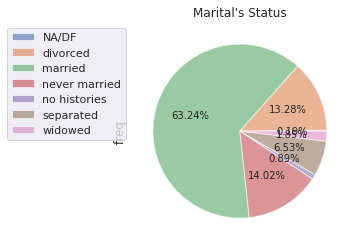

In [ ]:
pie_chart(df_data, "married", "Marital's Status")

In [ ]:
def bar_chart(dataframe, data, chart_title):
  df = dataframe
  df["freq"] = 1
  tmp = df.groupby(data)["freq"].sum()/df.shape[0] * 100
  tmp.plot.bar(x=[i for i in tmp.index], y="data", rot=70, figsize=(6, 4))
  plt.title(chart_title)

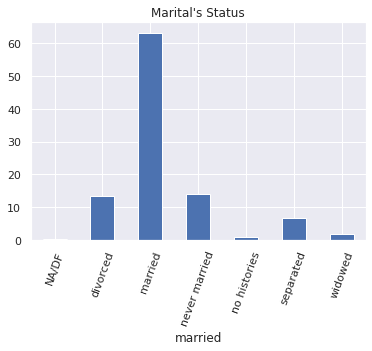

In [ ]:
bar_chart(df_data, "married", "Marital's Status")

Text(0.5, 0, 'Education Level')

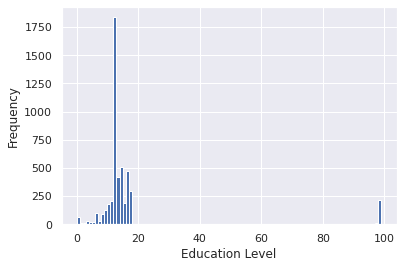

In [ ]:
df_data["educatn"].plot(kind="hist", bins=100)
plt.xlabel("Education Level")

Text(0.5, 0, 'Number of Kids')

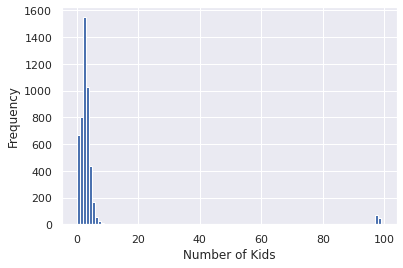

In [ ]:
df_data["kids"].plot(kind="hist", bins=100)
plt.xlabel("Number of Kids")

Text(0.5, 0, 'Earnings')

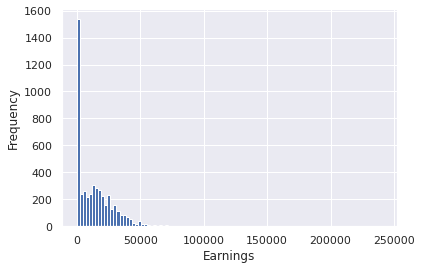

In [ ]:
df_data["earnings"].plot(kind="hist", bins=100)
plt.xlabel("Earnings")

Text(0.5, 0, 'Hours')

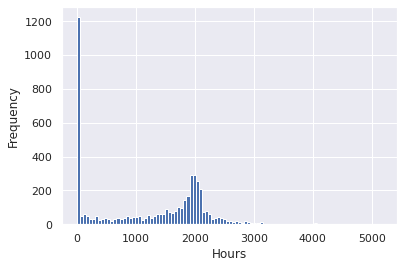

In [ ]:
df_data["hours"].plot(kind="hist", bins=100)
plt.xlabel("Hours")

## Remove Invalid Data

- Limiting Kids <= 20
- Limiting Education <= 20
- Limiting Earings <= 150000
- Limiting Hours > 0

Text(0.5, 0, 'Education Level')

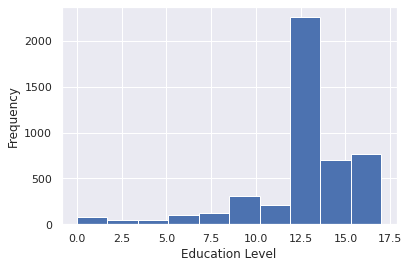

In [ ]:
df_data = df_data.drop(df_data[df_data.educatn > 20].index)

# visualizing the modified data
df_data["educatn"].plot(kind="hist", bins=10)
plt.xlabel("Education Level")

Text(0.5, 0, 'Number of Kids')

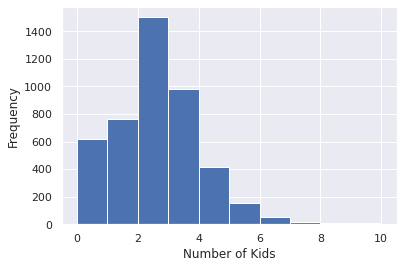

In [ ]:
df_data = df_data.drop(df_data[df_data.kids > 20].index)

# visualizing the modified data
df_data["kids"].plot(kind="hist", bins=10)
plt.xlabel("Number of Kids")

Text(0.5, 0, 'Earnings')

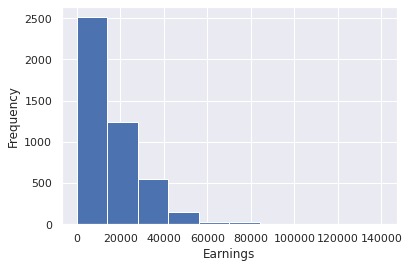

In [ ]:
df_data = df_data.drop(df_data[df_data.earnings > 150000].index)

# visualizing the modified data
df_data["earnings"].plot(kind="hist", bins=10)
plt.xlabel("Earnings")

Text(0.5, 0, 'Hours')

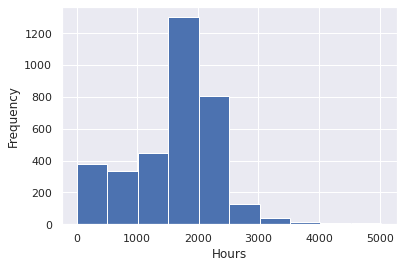

In [ ]:
df_data = df_data.drop(df_data[df_data.hours == 0].index)

# visualizing the modified data
df_data["hours"].plot(kind="hist", bins=10)
plt.xlabel("Hours")

In [ ]:
print("Final Statistics of The Given Dataset")
df_data = df_data.drop(["freq"], axis=1)    # drop unused data
df_data.describe()

Final Statistics of The Given Dataset


,age,educatn,earnings,hours,kids
count,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000
mean,38.498991,12.885270,18729.002306,1632.637071,2.018449
std,5.449603,2.504226,14883.422994,722.685055,1.337812
min,30.000000,0.000000,0.000000,6.000000,0.000000
25%,34.000000,12.000000,8000.000000,1213.000000,1.000000
50%,38.000000,12.000000,16000.000000,1856.000000,2.000000
75%,43.000000,14.000000,26000.000000,2040.000000,3.000000
max,50.000000,17.000000,140000.000000,5025.000000,10.000000


## Correlation Analysis

Attemp to analyze whether the number of hours a person work has an impact on his/her earnings. Focuss on following variables:
- Education level: `educatn`
- Earnings: `earnings`
- Working hours: `hours`
- Number of Kids: `kids`

### Identifying correlation between the variables using Pearson's correlatio coefficient

In [ ]:
df_data[["educatn", "earnings", "hours", "kids"]].corr(method="pearson")

,educatn,earnings,hours,kids
educatn,1.000000,0.387013,0.076206,-0.279871
earnings,0.387013,1.000000,0.466571,-0.241607
hours,0.076206,0.466571,1.000000,-0.116544
kids,-0.279871,-0.241607,-0.116544,1.000000


### Plotting the heatmap for correlation analysis

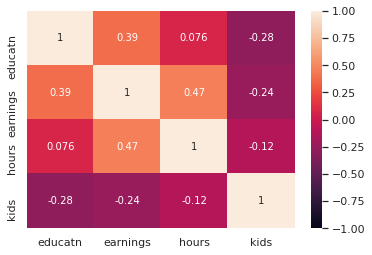

In [ ]:
correlations_index = df_data[["educatn", "earnings", "hours", "kids"]].corr(method="pearson")
sns.heatmap(correlations_index, vmin=-1, vmax=1, annot=True)

### Detail correlation analysis

In [ ]:
def detail_correlation(dataframe, x_axis, y_axis, title):
  sns.lmplot(x=x_axis, y=y_axis, data=dataframe)
  coef = stats.pearsonr(dataframe[x_axis], dataframe[y_axis])
  print(title)
  print("Pearson's r : %.3f"%coef[0])
  print("p-value     : %.3f"%coef[1])

Education Level v.s. Earnings
Pearson's r : 0.387
p-value     : 0.000


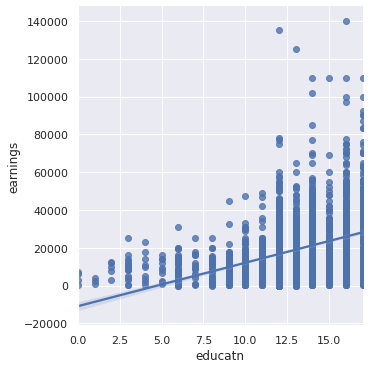

In [ ]:
detail_correlation(df_data, "educatn", "earnings", "Education Level v.s. Earnings")

Education Level v.s. Working Hours
Pearson's r : 0.076
p-value     : 0.000


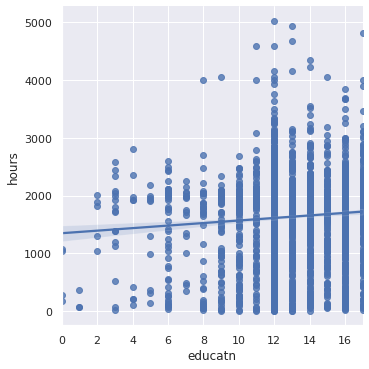

In [ ]:
detail_correlation(df_data, "educatn", "hours", "Education Level v.s. Working Hours")

Education Level v.s. Number of Kids
Pearson's r : -0.280
p-value     : 0.000


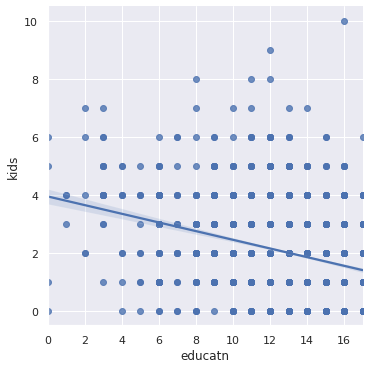

In [ ]:
detail_correlation(df_data, "educatn", "kids", "Education Level v.s. Number of Kids")

Earnings v.s. Working Hours
Pearson's r : 0.467
p-value     : 0.000


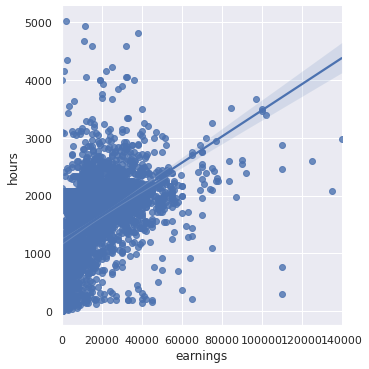

In [ ]:
detail_correlation(df_data, "earnings", "hours", "Earnings v.s. Working Hours")

Earnings v.s. Number of Kids
Pearson's r : -0.242
p-value     : 0.000


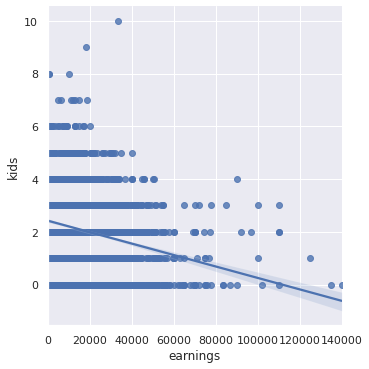

In [ ]:
detail_correlation(df_data, "earnings", "kids", "Earnings v.s. Number of Kids")

Working Hours v.s. Number of Kids
Pearson's r : -0.117
p-value     : 0.000


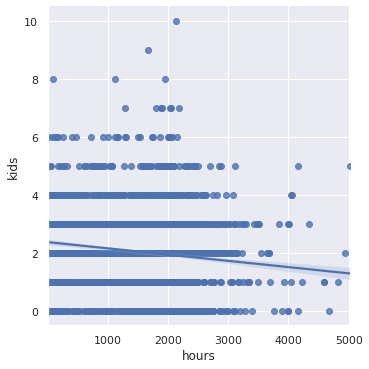

In [ ]:
detail_correlation(df_data, "hours", "kids", "Working Hours v.s. Number of Kids")

### Highest corelation: Earning v.s. Working Hours

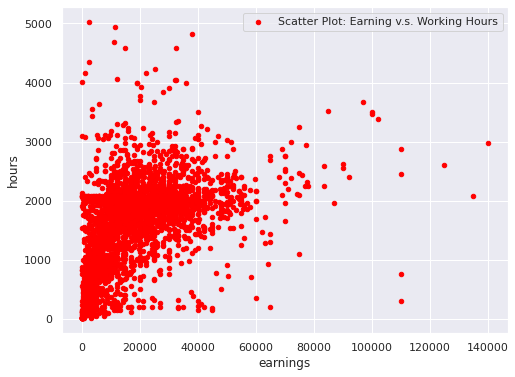

In [ ]:
df_data.plot.scatter(x="earnings", y="hours", c="red", figsize=(8,6), label="Scatter Plot: Earning v.s. Working Hours")

## Normality Test: Test for Normal Distribution for Variable Hours

In [ ]:
def normality_test(dataframe, variable, sample_size):
  if sample_size > dataframe.shape[0]:
    print("Sample size is larger than data size")
    return

  # H0: It's likely that variable is normally distribute
  # H1: It's unlikely that the variable is normally distributed
  # Accept H0 if p-value >= alpha
  value, p = stats.normaltest(dataframe[variable].sample(sample_size))
  print("> variable :", variable)
  print("> p-value  : %.3f"%p)
  if (p >= 0.05):
    print("It's likely that variable is normally distributed")
  else:
    print("It's unlikely that the variable is normally distributed")

In [ ]:
normality_test(df_data, "hours", 50)

> variable : hours
> p-value  : 0.017
It's unlikely that the variable is normally distributed


## Random Sampling: Extracting 2 Random and Equal Size Samples Without Replacement

Extract and plot the distribution value of people who have high earnings v.s. people who have low earnings

In [ ]:
sampling_size = 1000

high_low_earning_val_margin = df_data.earnings.median()
print("Margin value of high-low earning", high_low_earning_val_margin)

high_earning_hours = df_data[df_data.earnings > high_low_earning_val_margin].hours
print("Count of high earning people =", high_earning_hours.count())

low_earning_hours = df_data[df_data.earnings <= high_low_earning_val_margin].hours
print("Count of low earning people =", low_earning_hours.count())

Margin value of high-low earning 16000.0
Count of high earning people = 1707
Count of low earning people = 1762


In [ ]:
hours_of_high_earnings = df_data[df_data.earnings > high_low_earning_val_margin].hours.sample(sampling_size).sort_values()
hours_of_high_earnings.describe()

count    1000.000000
mean     1943.755000
std       482.607892
min       122.000000
25%      1795.500000
50%      1965.500000
75%      2107.750000
max      4049.000000
Name: hours, dtype: float64

In [ ]:
hours_of_low_earnings = df_data[df_data.earnings <= high_low_earning_val_margin].hours.sample(sampling_size).sort_values()
hours_of_low_earnings.describe()

count    1000.000000
mean     1340.640000
std       759.006541
min         6.000000
25%       730.750000
50%      1444.500000
75%      1960.000000
max      4940.000000
Name: hours, dtype: float64

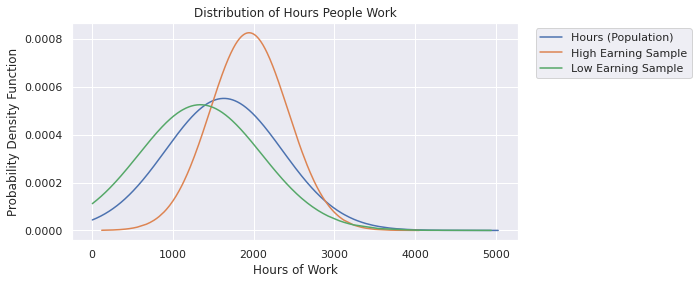

In [ ]:
# analyze for population data
population = df_data["hours"].sort_values()
mean = population.mean()
std_dev = population.std()
population_hours = stats.norm.pdf(population, mean, std_dev)

# analyze for first sample data
mean_fit1 = hours_of_high_earnings.mean()
std_dev_fit1 = hours_of_high_earnings.std()
hours_data_fit1 = stats.norm.pdf(hours_of_high_earnings, mean_fit1, std_dev_fit1)

# analyze for second sample data
mean_fit2 = hours_of_low_earnings.mean()
std_dev_fit2 = hours_of_low_earnings.std()
hours_data_fit2 = stats.norm.pdf(hours_of_low_earnings, mean_fit2, std_dev_fit2)

# plotting
label_1 = "Hours (Population)"
label_2 = "High Earning Sample"
label_3 = "Low Earning Sample"

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(population, population_hours, label=label_1)
ax.plot(hours_of_high_earnings, hours_data_fit1, label=label_2)
ax.plot(hours_of_low_earnings, hours_data_fit2, label=label_3)

plt.title("Distribution of Hours People Work")
plt.xlabel("Hours of Work")
plt.ylabel("Probability Density Function")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

## Hypothesis Testing

- H0: People with high or low earning work the same number of working hours
- H1: People with high earnings works more working hours than people with low earnings

In [ ]:
def hypothesis_testing(sample1, sample2, alpha):
  statistics, p_val = stats.ttest_ind(sample1, sample2)
  print("p-value          : %.3f"%p_val)
  print("confidence level : %.3f"%(1 - alpha))
  if p_val > alpha:
    print("Accept H0: People with high or low earning work the same number of working hours")
  else:
    print("Reject H0: People with high earnings works more working hours than people with low earnings")

In [ ]:
hypothesis_testing(hours_of_high_earnings, hours_of_low_earnings, 0.05)

p-value          : 0.000
confidence level : 0.950
Reject H0: People with high earnings works more working hours than people with low earnings
